In [57]:
import numpy as np
from fetch_data import get_data, remove_cols
from helper import *
from getters_alpaca import *
from ucimlrepo import fetch_ucirepo 
import torch
import torch.nn as nn

In [58]:
# get data
iris = fetch_ucirepo(id=53) 
  
X = iris.data.features 
y = iris.data.targets 
x_numpy = np.array(X)
y_numpy = np.array(y)

# Combine features and targets into a single array and shuffle them
data = np.column_stack((x_numpy, y_numpy))
np.random.shuffle(data)

x_numpy = data[:, :-1]
y_numpy = data[:, -1]

# Replacing plant names with corresponding numbers
label_encoder = pd.factorize(y_numpy.flatten())[1]
for i, name in enumerate(label_encoder):
    y_numpy[y_numpy == name] = i


m, n = x_numpy.shape # 150 x 4

x_train= torch.tensor(x_numpy[0:120].astype(float), dtype=torch.float)
y_train= torch.tensor(y_numpy[0:120].astype(int), dtype=torch.long)
x_test=torch.tensor(x_numpy[120:m].astype(float), dtype=torch.float)
y_test= torch.tensor(y_numpy[120:m].astype(int), dtype=torch.long)

In [65]:
class LinearRegresionModel(nn.Module):
    def __init__(self, in_features=4, l1 = 10, l2=10, out_features=3):
        super().__init__()
        self.weights1 = nn.Parameter(torch.randn(in_features, l1, dtype=torch.float), requires_grad=True)
        self.bias1 = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
        self.weights2 = nn.Parameter(torch.randn(l1, l2, dtype=torch.float), requires_grad=True)
        self.bias2 = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
        self.weights3 = nn.Parameter(torch.randn(l2, out_features, dtype=torch.float), requires_grad=True)
        self.bias3 = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    def forward(self, x) -> torch.Tensor:
       # print(f'{x.shape} x {self.weights1.size()}')
        x = torch.matmul(x, self.weights1) + self.bias1
        x = torch.relu(x)
       # print(f'{x.shape} x {self.weights2.size()}')
        x = torch.matmul(x, self.weights2) + self.bias2
        x = torch.relu(x)
        #print(f'{x.shape} x {self.weights2.size()}')
        x = torch.matmul(x, self.weights3) + self.bias3
        #print(x.shape)
        return x

In [66]:
torch.manual_seed(1)
model = LinearRegresionModel()

In [67]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss()

In [68]:
epochs = 500
losses = []
test_losses = []
for epoch in range(epochs):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    losses.append(torch.mean(loss).detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
    with torch.inference_mode():
      test_pred = model(x_test)
      test_loss = criterion(test_pred, y_test)
      test_losses.append(torch.mean(test_loss).detach().numpy())
      
      # Print the average loss every few epochs
    if (epoch + 1) % 10 == 0:  # Print every 10 epochs
        print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {loss}, Test avg loss: {test_loss}')
        


Epoch [10/500], Average Loss: 0.8867114186286926, Test avg loss: 0.8569980263710022
Epoch [20/500], Average Loss: 0.7427192330360413, Test avg loss: 0.6892481446266174
Epoch [30/500], Average Loss: 0.6468002200126648, Test avg loss: 0.5662127733230591
Epoch [40/500], Average Loss: 0.5867339968681335, Test avg loss: 0.5265870094299316
Epoch [50/500], Average Loss: 0.5319377183914185, Test avg loss: 0.4762708246707916
Epoch [60/500], Average Loss: 0.45563793182373047, Test avg loss: 0.40417665243148804
Epoch [70/500], Average Loss: 0.3380797803401947, Test avg loss: 0.25283679366111755
Epoch [80/500], Average Loss: 0.26166635751724243, Test avg loss: 0.20146431028842926
Epoch [90/500], Average Loss: 0.22363236546516418, Test avg loss: 0.17745214700698853
Epoch [100/500], Average Loss: 0.20970673859119415, Test avg loss: 0.16109058260917664
Epoch [110/500], Average Loss: 0.19939857721328735, Test avg loss: 0.1498131901025772
Epoch [120/500], Average Loss: 0.19119197130203247, Test avg los

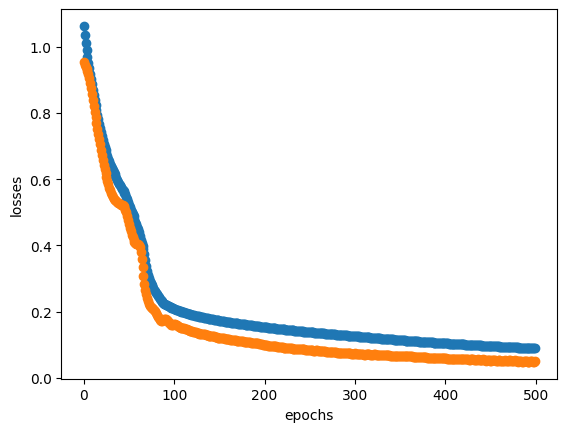

In [69]:
import matplotlib.pyplot as plt
plt.scatter(range(epochs), losses, label='Train losses')
plt.scatter(range(epochs), test_losses, label='Test losses')
plt.xlabel("epochs")
plt.ylabel("losses")
plt.show()

In [70]:
correctGuesses = 0
for i, flower in enumerate(x_test):
    with torch.inference_mode():
        y_preds = model(flower)
        correct = y_test[i]
        guess = torch.argmax(y_preds).item()
        
        if (int(correct) == guess): 
            correctGuesses+=1
        else: print(f'wrong!!!!: {y_preds}')
        print(f'expected: {int(correct)}, guessed: {guess}')
print(f'{correctGuesses}/30')
        

expected: 1, guessed: 1
expected: 0, guessed: 0
expected: 0, guessed: 0
expected: 1, guessed: 1
expected: 2, guessed: 2
expected: 1, guessed: 1
expected: 2, guessed: 2
expected: 2, guessed: 2
expected: 2, guessed: 2
expected: 0, guessed: 0
expected: 0, guessed: 0
expected: 1, guessed: 1
expected: 2, guessed: 2
expected: 0, guessed: 0
expected: 2, guessed: 2
expected: 0, guessed: 0
expected: 0, guessed: 0
expected: 0, guessed: 0
expected: 1, guessed: 1
expected: 1, guessed: 1
expected: 1, guessed: 1
expected: 2, guessed: 2
expected: 1, guessed: 1
expected: 1, guessed: 1
expected: 1, guessed: 1
expected: 1, guessed: 1
expected: 2, guessed: 2
expected: 2, guessed: 2
expected: 0, guessed: 0
expected: 2, guessed: 2
30/30
